**在plotnine中，ggplot与geom对象之间的关系主要体现在如下两点：**
* ggplot(data=NULL, mapping=aes()): ggplot内有data, mapping两个参数，具有<u>全局优先级</u>，可以被之后的所有geom对象继承（前提是geom内未指定相关参数）。
* geom_xxx(data=NULL, mapping=aes()): geom对象内同样有data和mapping参数，但geom内的data和mapping参数属于<u>局部参数</u>，仅作用于geom对象内部。

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotnine import *
mpl.rcParams['font.family'] = 'Times New Roman'
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
N = 20
df1 = pd.DataFrame(dict(x=np.sort(np.random.randn(N)), y=np.sort(np.random.randn(N))))
df2 = pd.DataFrame(dict(x=df1.x+0.3*np.sort(np.random.randn(N)), y=df1.y+0.1*np.random.randn(N)))
print(df1.head(), '\n', df2.head())

          x         y
0 -2.368476 -2.487040
1 -1.572306 -1.055651
2 -1.457584 -0.738019
3 -1.426346 -0.639299
4 -1.279614 -0.620618 
           x         y
0 -2.884926 -2.599974
1 -1.900284 -1.036615
2 -1.697814 -0.825278
3 -1.637468 -0.631774
4 -1.487866 -0.744078


#### 表3-7-7 plotnine中ggplot与geom对象之间的关系情况

#### a:所有图层共享数据源和美学映射参数
所有geom对象都使用相同的data和<u>mapping(x, y, size, alpha, color, fill, linetype, angle等)</u>, 根据参数继承规则，data和mapping指定在ggplot函数内，无论之后有多少个图层需要指定data和mapping,都仅需在ggplot内指定一次即可，后续geom会自动继承。

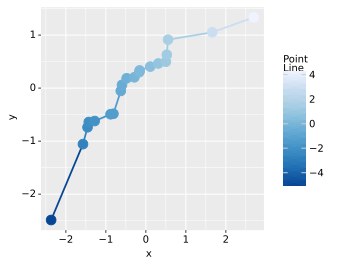

In [15]:
p1 = (ggplot(df1, aes('x', 'y', color='x+y'))
      + geom_line(size=1)
      + geom_point(shape='o', size=5)
      + scale_color_distiller(name='Line', palette='Blues')
      + guides(color=guide_colorbar(title='Point\nLine', direction='vertical')) # 改变图例的标题
      + theme(text=element_text(color='black', size=10), aspect_ratio=1, dpi=100, figure_size=(4, 4))
     )
print(p1)

#### 所有图层仅共享数据源
根据参数继承规则，将共享的数据源写在ggplot内，将不同图层单独使用的美学映射参数指定在各自的geom内，在遇到多图层时，data参数仅需在ggplot内指定一次，之后的geom对象会自动继承，不必一一指定，但是那些geom内部使用的各自美学映射属性则需一一指定

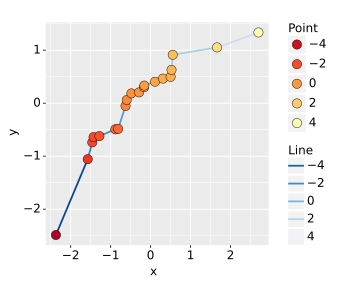

In [14]:
p2 = (ggplot(df1, aes('x', 'y'))
      + geom_line(aes(color='x+y'), size=1)
      + geom_point(aes(fill='x+y'), shape='o', stroke=0.25, size=5)
      + scale_fill_distiller(name='Point', palette='YlOrRd')
      + scale_color_distiller(name='Line', palette='Blues')
      + theme(text=element_text(color='black', size=12), aspect_ratio=1, dpi=100, figure_size=(4, 4))
      + guides(fill=guide_legend(title='Point'), color=guide_legend(title='Line')) #如果不加此句，图例会和语句不对应
     )
print(p2)

#### 各图层对象使用独立的数据源和美学映射参数
此为特殊情况，仅在涉及高级制图或者复杂地理信息多图层图表时才会接触，此时因为各图层没有共享任何data和mapping,假设有N个图层需要映射，此时所有的data和mapping参数都需要在各自geom内进行一一指定，因为在geom内指定毫无意义。

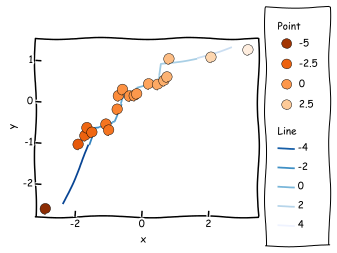

In [31]:
p3 = (ggplot()
      + geom_line(df1, aes('x', 'y', color='x+y'), size=1)
      + geom_point(df2, aes('x', 'y', fill='x+y'), color='black', shape='o', size=5, stroke=0.25)
      + theme_xkcd()
      + scale_fill_distiller(name='Point', palette='Oranges')
      + scale_color_distiller(name='Line', palette='Blues')
      + theme(text=element_text(color='black', size=10), aspect_ratio=0.8, dpi=100, figure_size=(4, 4))
      + guides(fill=guide_legend(title='Point'), color=guide_legend(title='Line'))
     )
print(p3)